In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#data = pd.read_csv('pre_dataset.csv')
data=pd.read_csv("/content/drive/Shareddrives/21-01 데마팀 화이팅/데이터셋/pre_dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1168 non-null   int64 
 1   name_kor_x      1168 non-null   object
 2   name_eng        1167 non-null   object
 3   producer_kor_x  1159 non-null   object
 4   producer_eng_x  1167 non-null   object
 5   region_kor      1168 non-null   object
 6   region_eng      1168 non-null   object
 7   style_kor       1168 non-null   object
 8   style_eng       1168 non-null   object
 9   apv             1168 non-null   object
 10  ibu             892 non-null    object
 11  price           949 non-null    object
 12  info            1147 non-null   object
 13  review_eng      930 non-null    object
 14  mean_average    993 non-null    object
 15  mean_review     947 non-null    object
 16  score           931 non-null    object
 17  mean_weighted   933 non-null    object
dtypes: int64

In [4]:
review = data[['review_eng']]
review['review_eng'][0:10]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: review_eng, dtype: object

In [5]:
import re
review['review_eng'] = review['review_eng'].map(lambda x: re.sub('[,\'.[!?]', '', str(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
review['review_eng']

0       nan
1       nan
2       nan
3       nan
4       nan
       ... 
1163    nan
1164    nan
1165    nan
1166    nan
1167    nan
Name: review_eng, Length: 1168, dtype: object

In [7]:
import nltk
nltk.download('punkt')
review['review_eng'] = review.apply(lambda row:nltk.word_tokenize(row['review_eng']), axis = 1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
print(review.head(30))

                                           review_eng
0                                               [nan]
1                                               [nan]
2                                               [nan]
3                                               [nan]
4                                               [nan]
5                                               [nan]
6                                               [nan]
7                                               [nan]
8                                               [nan]
9                                               [nan]
10  [500, ml, can, Pours, hazy, orange, liquid, wi...
11  [Can, Yellow, hazy, slightly, yellowish, foam,...
12                                              [nan]
13                                              [nan]
14  [Coffe, and, chocolate, tstrse, with, some, hi...
15  [Review, :, 05l, can, of, Steam, Brew, Imperia...
16  [Dark, copper, colour, with, white, head, Arom...
17                          

In [9]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
review['review_eng'] = review['review_eng'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
tokenized_doc = review['review_eng'].apply(lambda x: [word for word in x if len(word) > 3])
print(tokenized_doc[:30])

0                                                    []
1                                                    []
2                                                    []
3                                                    []
4                                                    []
5                                                    []
6                                                    []
7                                                    []
8                                                    []
9                                                    []
10    [Pours, hazy, orange, liquid, with, white, hea...
11    [Yellow, hazy, slightly, yellowish, foam, Arom...
12                                                   []
13                                                   []
14    [Coffe, chocolate, tstrse, with, some, hint, b...
15    [Review, Steam, Brew, Imperial, Love, Steam, B...
16    [Dark, copper, colour, with, white, head, Arom...
17                                              

In [11]:
#왜 에러나,, 유나 추가(0426 20:32)
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
stop_words.extend(['bottle', 'can', 'finish', 'good', 'nice', 'ok'])

In [14]:
tokens_pos = []
for i in range(len(tokenized_doc)):
  a = nltk.pos_tag(tokenized_doc[i])
  mini = []
  for word, pos in a:
    if 'JJ' in pos and word not in stop_words:
      mini.append(word)
      # tokens_pos.append((word,'JJ'))
  tokens_pos.append(mini)
print(tokens_pos)

[[], [], [], [], [], [], [], [], [], [], ['hazy', 'white', 'sweet', 'reddish', 'thin', 'pinkish', 'weak', 'sour', 'tall', 'brief', 'white', 'upfront', 'inoffensive'], ['Yellow', 'yellowish', 'flavor', 'sweet', 'lime', 'light', 'zest', 'refresh', 'yellow', 'decent', 'white', 'sweet'], [], [], ['watery', 'black', 'beige', 'chocolate', 'imperial', 'miss', 'black', 'beige', 'chocolate', 'imperial', 'miss', 'imperial', 'pretty', 'decent', 'high-ABV', 'easy', 'higher', 'med-high', 'malt', 'toffeeish', 'warm', 'empty', 'overall', 'enjoyable', 'great', 'heavy', 'bitter', 'front', 'middle', 'little', 'uncomplicated', 'drinkable', 'innovative', 'wont', 'doesnt', 'enjoyable', 'great', 'large', 'great', 'beige', 'flavour', 'note', 'toasty', 'watery'], ['full', 'exact', 'like', 'rusty', 'catch', 'gear', 'pour', 'alive', 'creamy', 'white', 'colour', 'fantastic', 'delicious', 'Good', 'strong', 'rich', 'tropical', 'typical', 'straight', 'powerful', 'nose', 'hoppy', 'deep', 'manageable', 'prominent', '

In [15]:
detokenized_doc = []
for i in range(len(review)):
    t = ' '.join(tokens_pos[i])
    detokenized_doc.append(t)

review['review_eng'] = detokenized_doc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
review['review_eng'].head(30)

0                                                      
1                                                      
2                                                      
3                                                      
4                                                      
5                                                      
6                                                      
7                                                      
8                                                      
9                                                      
10    hazy white sweet reddish thin pinkish weak sou...
11    Yellow yellowish flavor sweet lime light zest ...
12                                                     
13                                                     
14    watery black beige chocolate imperial miss bla...
15    full exact like rusty catch gear pour alive cr...
16    white floral herbal med-high moderate hoppy gr...
17                                              

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words, 
max_features= 1000) # 상위 1,000개의 단어를 보존 
X = vectorizer.fit_transform(review['review_eng'])
X.shape # TF-IDF 행렬의 크기 확인

(1168, 1000)

In [18]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1)

In [19]:
lda_top=lda_model.fit_transform(X)

In [20]:
print(lda_model.components_)
print(lda_model.components_.shape) 

[[0.26704693 0.26039447 0.29439622 ... 0.2835882  0.31738727 0.26397847]
 [0.24168789 0.26834621 0.26710771 ... 0.28309368 0.27242511 0.28111397]
 [0.26590252 0.32372682 0.27046278 ... 0.27142908 0.30691398 0.26920451]
 ...
 [0.30153092 0.27617894 0.27618012 ... 0.35930416 0.28384981 0.35384072]
 [0.85323332 1.51211178 1.04195283 ... 1.70498965 0.65628014 0.59681123]
 [0.26200698 0.28986206 0.28528418 ... 0.26377902 0.29551727 0.25557504]]
(10, 1000)


In [21]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('white', 1.45), ('sour', 1.41), ('light', 1.0), ('bitter', 0.94), ('sweet', 0.85)]
Topic 2: [('white', 1.09), ('golden', 0.8), ('sweet', 0.61), ('yellow', 0.61), ('light', 0.61)]
Topic 3: [('white', 0.68), ('tropical', 0.67), ('hoppy', 0.55), ('black', 0.55), ('dark', 0.55)]
Topic 4: [('white', 3.27), ('yellow', 1.71), ('hoppy', 1.6), ('golden', 1.54), ('sweet', 1.53)]
Topic 5: [('white', 1.24), ('sour', 0.84), ('golden', 0.68), ('little', 0.64), ('cheese', 0.64)]
Topic 6: [('white', 20.33), ('clear', 12.1), ('golden', 11.05), ('light', 10.01), ('sweet', 9.47)]
Topic 7: [('white', 0.75), ('tropical', 0.72), ('bitter', 0.67), ('hoppy', 0.64), ('sweet', 0.62)]
Topic 8: [('white', 4.84), ('sour', 3.52), ('golden', 3.22), ('light', 2.69), ('sweet', 2.35)]
Topic 9: [('white', 65.96), ('sweet', 42.67), ('light', 41.68), ('bitter', 35.97), ('golden', 33.03)]
Topic 10: [('rich', 0.5), ('white', 0.46), ('gingerbread', 0.45), ('needle', 0.44), ('black', 0.43)]


In [22]:
from gensim import corpora
dictionary = corpora.Dictionary(tokens_pos)
corpus = [dictionary.doc2bow(text) for text in tokens_pos]
print(corpus[30])

[(5, 1), (8, 1), (11, 4), (13, 2), (26, 1), (30, 1), (32, 1), (39, 3), (66, 2), (70, 4), (78, 1), (90, 1), (101, 1), (106, 1), (119, 2), (127, 1), (130, 1), (131, 3), (140, 1), (169, 1), (179, 1), (200, 1), (237, 1), (243, 1), (244, 1), (245, 1), (246, 1), (247, 1), (248, 1), (249, 1), (250, 1), (251, 1), (252, 1), (253, 1), (254, 1), (255, 1), (256, 1), (257, 1)]


In [51]:
import gensim
NUM_TOPICS = 18
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word = dictionary, passes =20)
topics = ldamodel.print_topics(num_words = 7)

for topic in topics:
  print(topic)

(0, '0.066*"white" + 0.041*"light" + 0.034*"sweet" + 0.032*"golden" + 0.025*"little" + 0.021*"small" + 0.019*"clear"')
(1, '0.077*"black" + 0.048*"dark" + 0.041*"sweet" + 0.035*"brown" + 0.029*"light" + 0.024*"bitter" + 0.022*"little"')
(2, '0.019*"white" + 0.009*"sure" + 0.009*"tasty" + 0.009*"overall" + 0.008*"large" + 0.008*"touch" + 0.007*"grassy"')
(3, '0.089*"white" + 0.044*"golden" + 0.032*"light" + 0.026*"strong" + 0.023*"bitter" + 0.023*"sweet" + 0.021*"floral"')
(4, '0.009*"mute" + 0.005*"pronounce" + 0.005*"Rich" + 0.005*"faint" + 0.005*"earthy/musty" + 0.005*"sweeten" + 0.005*"mocha-colored"')
(5, '0.025*"bitter" + 0.024*"white" + 0.021*"little" + 0.020*"clear" + 0.015*"sweet" + 0.015*"hoppy" + 0.014*"off-white"')
(6, '0.020*"pecan" + 0.008*"moderate" + 0.007*"cherry" + 0.007*"stronger" + 0.006*"better" + 0.006*"yeasty" + 0.006*"touch"')
(7, '0.053*"white" + 0.024*"little" + 0.021*"golden" + 0.020*"sweet" + 0.019*"clear" + 0.017*"light" + 0.013*"thin"')
(8, '0.060*"sour" + 

In [24]:
! pip install pyLDAvis

In [25]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [52]:
vis = gensimvis.prepare(ldamodel, corpus, dictionary)

In [53]:
pyLDAvis.display(vis)

In [30]:
import warnings
from gensim.models.coherencemodel import CoherenceModel


coherences=[]
perplexities=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(10):
    
    ntopics, nwords = 200, 100
    if i==0:
        p=1
    else:
        p=i*5
    lda4 = gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p)
    print('epoch',p)
    # tfidf, corpus 무슨 차이?
    # lda = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=200000)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherences.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexities.append(lda4.log_perplexity(corpus))

epoch 1
Cpherence -3.660586430716784
Perplexity:  -7.619576440037385 


epoch 5
Cpherence -3.552345285758844
Perplexity:  -7.413172177237275 


epoch 10
Cpherence -3.957517076377655
Perplexity:  -7.254930885109974 


epoch 15
Cpherence -3.8559234269772116
Perplexity:  -7.198123184281931 


epoch 20
Cpherence -3.437108326707735
Perplexity:  -7.143110936322029 


epoch 25
Cpherence -4.185726235121545
Perplexity:  -7.122312336828076 


epoch 30
Cpherence -4.365655006507941
Perplexity:  -7.064292733622051 


epoch 35
Cpherence -3.860654129605525
Perplexity:  -7.12692912481439 


epoch 40
Cpherence -4.118019894836607
Perplexity:  -7.0919213107127765 


epoch 45
Cpherence -3.635322980924309
Perplexity:  -7.093987958138355 




In [41]:
passes = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [32]:
coherences

[-3.660586430716784,
 -3.552345285758844,
 -3.957517076377655,
 -3.8559234269772116,
 -3.437108326707735,
 -4.185726235121545,
 -4.365655006507941,
 -3.860654129605525,
 -4.118019894836607,
 -3.635322980924309]

In [36]:
import matplotlib.pyplot as plt

In [38]:
perplexities

[-7.620015136516662,
 -7.414707724226699,
 -7.2535903589029855,
 -7.198552205939176,
 -7.142678743384673,
 -7.122630916863932,
 -7.064718553998812,
 -7.127047308967986,
 -7.092041827617042,
 -7.094479667631487]

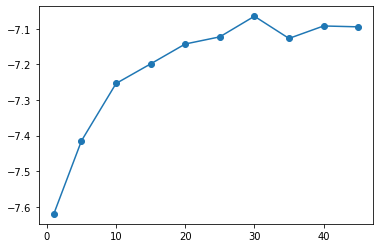

In [43]:
plt.plot(passes, perplexities,  marker='o')
plt.show()

<function matplotlib.pyplot.show>

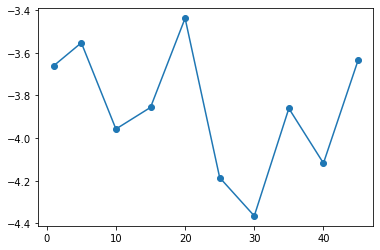

In [44]:
plt.plot(passes, coherences, marker = 'o')
plt.show

In [45]:
coherencesT=[]
perplexitiesT=[]
passes=[]
warnings.filterwarnings('ignore')

for i in range(10):
    if i==0:
        ntopics = 2
    else:
        ntopics = 3*i
    nwords = 100
    lda4 = gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=20)
    print('ntopics',ntopics)

    cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    print("Cpherence",coherence)
    coherencesT.append(coherence)
    print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
    perplexitiesT.append(lda4.log_perplexity(corpus))

ntopics 2
Cpherence -1.021941318089365
Perplexity:  -6.083467256169501 


ntopics 3
Cpherence -1.299511759693737
Perplexity:  -6.090018263019948 


ntopics 6
Cpherence -3.425046254067658
Perplexity:  -6.1695811975984665 


ntopics 9
Cpherence -3.150615151008671
Perplexity:  -6.2007787888777965 


ntopics 12
Cpherence -2.9181694419657447
Perplexity:  -6.202878715725199 


ntopics 15
Cpherence -3.9984360360632594
Perplexity:  -6.23634821442018 


ntopics 18
Cpherence -2.784066328641076
Perplexity:  -6.28223041627141 


ntopics 21
Cpherence -3.154412351524517
Perplexity:  -6.272610612762044 


ntopics 24
Cpherence -2.336568864724265
Perplexity:  -6.3416185939529 


ntopics 27
Cpherence -3.0973976137973493
Perplexity:  -6.3312806194376945 




<function matplotlib.pyplot.show>

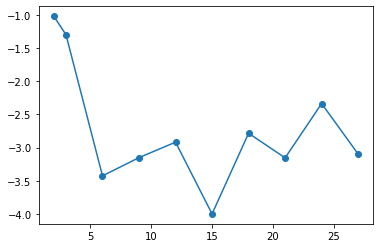

In [48]:
topics = [2, 3, 6, 9, 12, 15, 18, 21, 24, 27]
plt.plot(topics, coherencesT, marker = 'o')
plt.show

<function matplotlib.pyplot.show>

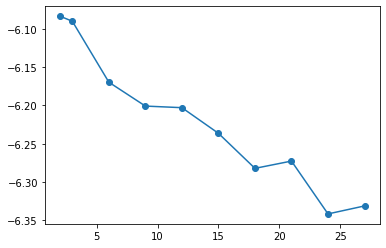

In [49]:
plt.plot(topics, perplexitiesT, marker = 'o')
plt.show